In [5]:
import numpy as np

In [3]:
def loadDataSet(filename):
    '''
    加载数据
    Args:
        filename: 文件名
    Return:
        特征值矩阵，预测值矩阵
    '''
    dataArr = []
    labelArr = []
    with open(filename) as fr: 
        for idx,line in enumerate(fr):
            lineArr = line.strip().split('\t')
            if idx == 0:
                numFeat = len(lineArr) - 1      # 减1是因为最后一个是预测值
            lineArr = list(map(float, lineArr))
            dataArr.append(lineArr[:-1])
            labelArr.append([lineArr[-1]])
    return np.mat(dataArr),np.mat(labelArr)

## 最小二乘法计算参数
$$ w = (X^T X)^{-1}X^Ty $$

In [20]:
def standRegres(xMat, yMat):
    '''最小二乘法,计算最佳拟合直线'''
    xTx = xMat.T * xMat
    # 如果矩阵行列式为0，则无逆
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * xMat.T * yMat
    return ws

In [23]:
xMat, yMat = loadDataSet('ex0.txt')
xMat[0:2]

matrix([[1.      , 0.067732],
        [1.      , 0.42781 ]])

In [24]:
ws = standRegres(xMat, yMat)
ws

(2, 2) (2, 200) (200, 1)


matrix([[3.00774324],
        [1.69532264]])

In [25]:
yHat = xMat * ws
yHat

matrix([[3.12257084],
        [3.73301922],
        [4.69582855],
        [4.25946098],
        [4.67099547],
        [3.89977285],
        [3.65007895],
        [3.06514517],
        [3.23286683],
        [3.24221654],
        [3.42785945],
        [4.10677005],
        [4.24737842],
        [3.40925159],
        [4.6518468 ],
        [4.03763819],
        [3.61572324],
        [3.25838991],
        [4.08905393],
        [3.39829811],
        [3.12681762],
        [3.12159094],
        [4.57689489],
        [4.22453225],
        [3.03380205],
        [3.575795  ],
        [3.07638008],
        [3.36812645],
        [4.05412689],
        [3.92524508],
        [3.08463121],
        [3.22264573],
        [3.95116656],
        [4.53547307],
        [4.63266931],
        [3.47321272],
        [3.67637171],
        [4.48687834],
        [3.70271024],
        [4.54873897],
        [3.29055527],
        [4.13515992],
        [3.4548456 ],
        [3.39972557],
        [3.9451346 ],
        [3

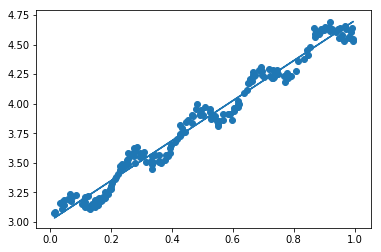

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T.flatten().A[0])
yHat = xMat * ws
ax.plot(xMat[:,1].flatten().A[0], yHat.T.flatten().A[0])

### 计算预测值与实际值的相关系数

In [43]:
np.corrcoef(yHat.T, yMat.T)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归（LWLR）
给待预测点附近的每个点赋予一定的权重，在子集上基于最小均方误差进行普通的回归，这种算法每次预测均需要事先选取出对应的数据子集。回归系数计算如下：
$$ w = (X^TWX)^{-1}X^TWy $$
其中 $ W $ 是权值矩阵（对角）<br/>
使用“核”来对附近的点赋予更高的权重：
$$ W(i,i) = exp(\frac{|x^{(i)}-x|}{-2k^2}) $$

In [127]:
def lwlr(testPoint, xMat, yMat, k=1.0):
    '''
    给定空间中一点testPoint,计算出对应的预测值
    '''
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    # 权重值大小以指数级衰减;为每个样本点计算权重
    for j in range(m):                      
        diffMat = testPoint - xMat[j,:]     
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [128]:
def lwlrTest(testMat,xMt,yMat,k=1.0):  #loops over all the data points and applies lwlr to each one
    '''计算整个训练集的预测值，可用于画图选择k'''
    m = np.shape(testMat)[0]
    yHat = np.zeros((m,1))
    for i in range(m):
        yHat[i] = lwlr(testMat[i],xMat,yMat,k)
    return yHat

In [106]:
xMat, yMat = loadDataSet('ex0.txt')
yMat[0]

matrix([[3.176513]])

In [107]:
lwlr(xMat[0], xMat, yMat, 1.0)

matrix([[3.12204471]])

In [108]:
import matplotlib.pyplot as plt
def showLwlrPlot(xMat, yMat, k=1.0):
    yHat = lwlrTest(xMat, xMat, yMat, k)
    srtInd = xMat[:, 1].argsort(0)
    xSort = xMat[srtInd][:, 0, :]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSort[:, 1].T.flatten().A[0], yHat[srtInd].T.flatten())
    ax.scatter(xMat[:,1].flatten().A[0], yMat.T.flatten().A[0], s=2, c='red')
    plt.show()

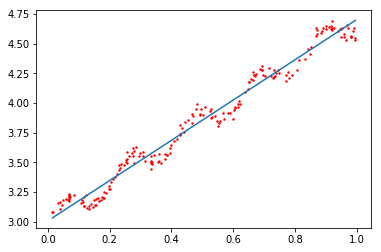

In [109]:
showLwlrPlot(xMat, yMat)

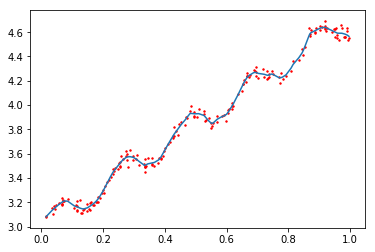

In [110]:
showLwlrPlot(xMat, yMat, 0.01)

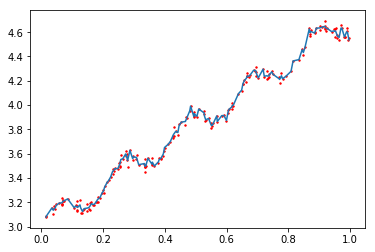

In [111]:
showLwlrPlot(xMat, yMat, 0.003)

# 小例子---预测鲍鱼年龄

In [16]:
def rssError(yMat,yHat):
    '''误差和'''
    return ((np.array(yMat)-np.array(yHat))**2).sum()

In [144]:
abXMat, abYMat = loadDataSet('abalone.txt')
xMat = abXMat[0:99]
yMat = abYMat[0:99]
yHat01 = lwlrTest(xMat, xMat, yMat, 0.1)
yHat1 = lwlrTest(xMat, xMat, yMat, 1)
yHat10 = lwlrTest(xMat, xMat, yMat, 10)

In [146]:
print(rssError(yMat, yHat01))
print(rssError(yMat, yHat1))
print(rssError(yMat, yHat10))

56.78420911837208
429.89056187030394
549.1181708826065


In [148]:
yHat01 = lwlrTest(abXMat[100:199], xMat, yMat, 0.1)
print(rssError(abYMat[100:199], yHat01))
yHat1 = lwlrTest(abXMat[100:199], xMat, yMat, 1)
print(rssError(abYMat[100:199], yHat1))
yHat10 = lwlrTest(abXMat[100:199], xMat, yMat, 10)
print(rssError(abYMat[100:199], yHat10))

25119.459111157415
573.5261441895706
517.5711905381745


In [154]:
ws = standRegres(xMat, yMat)
yHat = abXMat[100:199] * ws
print(rssError(abYMat[100:199], yHat))

518.6363153250693


# 岭回归（ridge regression）
当数据的特征比样本还多时，矩阵x为非满秩矩阵，求逆会出现问题<br/>
**岭回归**是对使用 $ (X^TX + \lambda I) $ 从而使得矩阵非奇异，来求逆, $ I_(m \times m) $ 的单位矩阵<br/>
参数求解： $$ w = (X^TX + \lambda I)^{-1}X^Ty $$

In [11]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws
    
def ridgeTest(xMat,yMat):
    yMean = np.mean(yMat,axis=0)
    yMat = yMat - yMean     #to eliminate X0 take mean off of Y
    #regularize X's
    xMeans = np.mean(xMat,axis=0)   #calc mean then subtract it off
    xVar = np.var(xMat,axis=0)      #calc variance of Xi then divide by it
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,np.exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [12]:
abXMat, abYMat = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abXMat, abYMat)

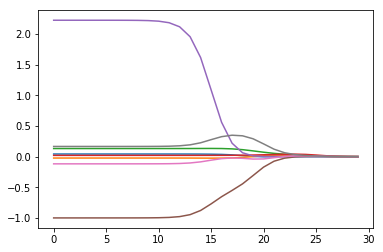

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [14]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis=0)   #calc mean then subtract it off
    inVar = np.var(inMat,axis=0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

def stageWise(xMat,yMat,eps=0.01,numIt=100):
    yMean = np.mean(yMat,axis=0)
    yMat = yMat - yMean     #can also regularize ys but will get smaller coef
    xMat = regularize(xMat)
    m,n=np.shape(xMat)
    returnMat = np.zeros((numIt,n)) #testing code remove
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = np.inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [29]:
xMat, yMat = loadDataSet('abalone.txt')
stageWise(xMat, yMat, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [18]:
stageWise(xMat, yMat, 0.001, 5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[ 0.     0.     0.005  0.046  0.    -0.011  0.     0.129]]
[[ 0.     0.     0.005  0.046  0.    -0.012  0.     0.129]]
[[ 0.     0.     0.005  0.046  0.    -0.012  0.     0.13 ]]
[[ 0.     0.     0.005  0.046  0.    -0.013  0.     0.13 ]]
[[ 0.     0.     0.005  0.046  0.    -0.013  0.     0.131]]
[[ 0.     0.     0.005  0.046  0.    -0.014  0.     0.131]]
[[ 0.     0.     0.005  0.046  0.    -0.015  0.     0.131]]
[[ 0.     0.     0.005  0.046  0.    -0.015  0.     0.132]]
[[ 0.     0.     0.005  0.046  0.    -0.016  0.     0.132]]
[[ 0.     0.     0.005  0.046  0.    -0.016  0.     0.133]]
[[ 0.     0.     0.005  0.046  0.    -0.017  0.     0.133]]
[[ 0.     0.     0.005  0.046  0.    -0.018  0.     0.133]]
[[ 0.     0.     0.005  0.046  0.    -0.018  0.     0.134]]
[[ 0.     0.     0.005  0.046  0.    -0.019  0.     0.134]]
[[ 0.     0.     0.005  0.046  0.    -0.02   0.     0.134]]
[[ 0.     0.     0.005  0.046  0.    -0.02   0.     0.135]]
[[ 0.     0.     0.005  0.046  0.    -0.

[[ 0.     0.     0.006  0.042  0.    -0.139  0.     0.217]]
[[ 0.     0.     0.006  0.042  0.    -0.14   0.     0.217]]
[[ 0.     0.     0.007  0.042  0.    -0.14   0.     0.217]]
[[ 0.     0.     0.007  0.042  0.    -0.141  0.     0.217]]
[[ 0.     0.     0.007  0.042  0.    -0.142  0.     0.217]]
[[ 0.     0.     0.007  0.042  0.    -0.142  0.     0.218]]
[[ 0.     0.     0.007  0.042  0.    -0.143  0.     0.218]]
[[ 0.     0.     0.007  0.042  0.    -0.144  0.     0.218]]
[[ 0.     0.     0.008  0.042  0.    -0.144  0.     0.218]]
[[ 0.     0.     0.008  0.042  0.    -0.145  0.     0.218]]
[[ 0.     0.     0.008  0.042  0.    -0.146  0.     0.218]]
[[ 0.     0.     0.008  0.042  0.    -0.146  0.     0.219]]
[[ 0.     0.     0.008  0.042  0.    -0.147  0.     0.219]]
[[ 0.     0.     0.008  0.042  0.    -0.147  0.     0.22 ]]
[[ 0.     0.     0.008  0.042  0.    -0.148  0.     0.22 ]]
[[ 0.     0.     0.008  0.042  0.    -0.149  0.     0.22 ]]
[[ 0.     0.     0.009  0.042  0.    -0.

[[ 0.     0.     0.041  0.036  0.    -0.273  0.     0.27 ]]
[[ 0.     0.     0.041  0.036  0.    -0.274  0.     0.27 ]]
[[ 0.     0.     0.041  0.036  0.    -0.275  0.     0.27 ]]
[[ 0.     0.     0.041  0.036  0.    -0.275  0.     0.271]]
[[ 0.     0.     0.041  0.036  0.    -0.276  0.     0.271]]
[[ 0.     0.     0.041  0.036  0.    -0.277  0.     0.271]]
[[ 0.     0.     0.041  0.036  0.    -0.277  0.     0.272]]
[[ 0.     0.     0.041  0.036  0.    -0.278  0.     0.272]]
[[ 0.     0.     0.041  0.036  0.    -0.279  0.     0.272]]
[[ 0.     0.     0.042  0.036  0.    -0.279  0.     0.272]]
[[ 0.     0.     0.042  0.036  0.    -0.28   0.     0.272]]
[[ 0.     0.     0.042  0.036  0.    -0.281  0.     0.272]]
[[ 0.     0.     0.042  0.036  0.    -0.281  0.     0.273]]
[[ 0.     0.     0.042  0.036  0.    -0.282  0.     0.273]]
[[ 0.     0.     0.042  0.036  0.    -0.282  0.     0.274]]
[[ 0.     0.     0.042  0.035  0.    -0.282  0.     0.274]]
[[ 0.     0.     0.043  0.035  0.    -0.

[[ 0.     0.     0.074  0.03   0.    -0.405  0.     0.323]]
[[ 0.     0.     0.074  0.03   0.    -0.406  0.     0.323]]
[[ 0.     0.     0.074  0.03   0.    -0.406  0.     0.324]]
[[ 0.     0.     0.074  0.03   0.    -0.407  0.     0.324]]
[[ 0.     0.     0.074  0.03   0.    -0.408  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.408  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.409  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.41   0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.41   0.     0.325]]
[[ 0.     0.     0.075  0.03   0.    -0.411  0.     0.325]]
[[ 0.     0.     0.075  0.03   0.    -0.412  0.     0.325]]
[[ 0.     0.     0.076  0.03   0.    -0.412  0.     0.325]]
[[ 0.     0.     0.076  0.029  0.    -0.412  0.     0.325]]
[[ 0.     0.     0.077  0.029  0.    -0.412  0.     0.325]]
[[ 0.     0.     0.077  0.029  0.    -0.412  0.     0.326]]
[[ 0.     0.     0.077  0.029  0.    -0.413  0.     0.326]]
[[ 0.     0.     0.077  0.029  0.    -0.

[[ 0.     0.     0.107  0.024  0.    -0.533  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.    -0.534  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.001 -0.534  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.002 -0.534  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.002 -0.535  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.003 -0.535  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.004 -0.535  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.004 -0.536  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.005 -0.536  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.006 -0.536  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.006 -0.537  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.007 -0.537  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.008 -0.537  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.008 -0.538  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.008 -0.538  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.008 -0.539  0.     0.374]]
[[ 0.     0.     0.108  0.024  0.008 -0.

[[ 0.003  0.     0.11   0.022  0.151 -0.59  -0.005  0.374]]
[[ 0.003  0.     0.11   0.022  0.152 -0.59  -0.005  0.374]]
[[ 0.003  0.     0.11   0.022  0.153 -0.59  -0.005  0.374]]
[[ 0.004  0.     0.11   0.022  0.153 -0.59  -0.005  0.374]]
[[ 0.004  0.     0.11   0.022  0.154 -0.59  -0.005  0.374]]
[[ 0.004  0.     0.11   0.022  0.154 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.155 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.156 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.157 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.158 -0.59  -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.158 -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.159 -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.591 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.16  -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.161 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.592 -0.006  0.374]]
[[ 0.004  0.     0.11   0.022  0.162 -0.

[[ 0.008  0.     0.11   0.022  0.309 -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.31  -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.311 -0.622 -0.015  0.361]]
[[ 0.008  0.     0.11   0.022  0.311 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.312 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.313 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.314 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.315 -0.622 -0.016  0.361]]
[[ 0.008  0.     0.11   0.022  0.315 -0.622 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.316 -0.622 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.317 -0.622 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.318 -0.622 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.318 -0.623 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.319 -0.623 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.32  -0.623 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.32  -0.624 -0.016  0.36 ]]
[[ 0.008  0.     0.11   0.022  0.321 -0.

[[ 0.011  0.     0.11   0.022  0.466 -0.654 -0.023  0.345]]
[[ 0.011  0.     0.11   0.022  0.467 -0.654 -0.023  0.345]]
[[ 0.011  0.     0.11   0.022  0.468 -0.654 -0.023  0.345]]
[[ 0.011  0.     0.11   0.022  0.469 -0.654 -0.023  0.345]]
[[ 0.011  0.     0.11   0.022  0.469 -0.654 -0.024  0.345]]
[[ 0.011  0.     0.11   0.022  0.47  -0.654 -0.024  0.345]]
[[ 0.011  0.     0.11   0.022  0.471 -0.654 -0.024  0.345]]
[[ 0.011  0.     0.11   0.022  0.472 -0.654 -0.024  0.345]]
[[ 0.011  0.     0.11   0.022  0.473 -0.654 -0.024  0.345]]
[[ 0.011  0.     0.11   0.022  0.473 -0.654 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.474 -0.654 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.475 -0.654 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.476 -0.654 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.476 -0.655 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.477 -0.655 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.478 -0.655 -0.024  0.344]]
[[ 0.011  0.     0.11   0.022  0.478 -0.

[[ 0.014  0.     0.11   0.022  0.628 -0.685 -0.032  0.329]]
[[ 0.014  0.     0.11   0.022  0.629 -0.685 -0.032  0.329]]
[[ 0.014  0.     0.11   0.022  0.629 -0.685 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.63  -0.685 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.631 -0.685 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.632 -0.685 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.632 -0.686 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.633 -0.686 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.634 -0.686 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.634 -0.687 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.635 -0.687 -0.032  0.328]]
[[ 0.014  0.     0.11   0.022  0.636 -0.687 -0.032  0.328]]
[[ 0.015  0.     0.11   0.022  0.636 -0.687 -0.032  0.328]]
[[ 0.015  0.     0.11   0.022  0.637 -0.687 -0.032  0.328]]
[[ 0.015  0.     0.11   0.022  0.637 -0.687 -0.033  0.328]]
[[ 0.015  0.     0.11   0.022  0.638 -0.687 -0.033  0.328]]
[[ 0.015  0.     0.11   0.022  0.639 -0.

[[ 0.017  0.     0.11   0.022  0.788 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.789 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.789 -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.79  -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.791 -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.791 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.792 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.793 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.794 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.795 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.795 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.796 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.798 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.799 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.799 -0.

[[ 0.02   0.     0.11   0.022  0.94  -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.941 -0.747 -0.048  0.297]]
[[ 0.02   0.     0.11   0.022  0.941 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.942 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.943 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.944 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.945 -0.747 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.945 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.946 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.947 -0.748 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.947 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.948 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.949 -0.749 -0.049  0.297]]
[[ 0.02   0.     0.11   0.022  0.949 -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.95  -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.951 -0.749 -0.049  0.296]]
[[ 0.02   0.     0.11   0.022  0.952 -0.

[[ 0.024  0.     0.11   0.022  1.091 -0.778 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.092 -0.778 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.093 -0.778 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.093 -0.779 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.094 -0.779 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.095 -0.779 -0.056  0.282]]
[[ 0.024  0.     0.11   0.022  1.095 -0.779 -0.056  0.281]]
[[ 0.024  0.     0.11   0.022  1.096 -0.779 -0.056  0.281]]
[[ 0.024  0.     0.11   0.022  1.097 -0.779 -0.056  0.281]]
[[ 0.024  0.     0.11   0.022  1.098 -0.779 -0.056  0.281]]
[[ 0.024  0.     0.11   0.022  1.099 -0.779 -0.056  0.281]]
[[ 0.024  0.     0.11   0.022  1.099 -0.779 -0.057  0.281]]
[[ 0.024  0.     0.11   0.022  1.1   -0.779 -0.057  0.281]]
[[ 0.024  0.     0.11   0.022  1.101 -0.779 -0.057  0.281]]
[[ 0.024  0.     0.11   0.022  1.102 -0.779 -0.057  0.281]]
[[ 0.024  0.     0.11   0.022  1.103 -0.779 -0.057  0.281]]
[[ 0.024  0.     0.11   0.022  1.103 -0.

[[ 0.026  0.     0.11   0.022  1.206 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.207 -0.8   -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.207 -0.801 -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.208 -0.801 -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.209 -0.801 -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.21  -0.801 -0.062  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.21  -0.801 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.211 -0.801 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.212 -0.801 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.213 -0.801 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.214 -0.801 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.214 -0.802 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.215 -0.802 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.216 -0.802 -0.063  0.27 ]]
[[ 0.026  0.     0.11   0.022  1.216 -0.802 -0.063  0.269]]
[[ 0.026  0.     0.11   0.022  1.217 -0.802 -0.063  0.269]]
[[ 0.026  0.     0.11   0.022  1.218 -0.

[[ 0.029  0.     0.11   0.022  1.341 -0.828 -0.069  0.257]]
[[ 0.029  0.     0.11   0.022  1.342 -0.828 -0.069  0.257]]
[[ 0.03   0.     0.11   0.022  1.342 -0.828 -0.069  0.257]]
[[ 0.03   0.     0.11   0.022  1.343 -0.828 -0.069  0.257]]
[[ 0.03   0.     0.11   0.022  1.343 -0.828 -0.07   0.257]]
[[ 0.03   0.     0.11   0.022  1.344 -0.828 -0.07   0.257]]
[[ 0.03   0.     0.11   0.022  1.345 -0.828 -0.07   0.257]]
[[ 0.03   0.     0.11   0.022  1.346 -0.828 -0.07   0.257]]
[[ 0.03   0.     0.11   0.022  1.347 -0.828 -0.07   0.257]]
[[ 0.03   0.     0.11   0.022  1.347 -0.828 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.348 -0.828 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.349 -0.828 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.35  -0.828 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.35  -0.829 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.351 -0.829 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.352 -0.829 -0.07   0.256]]
[[ 0.03   0.     0.11   0.022  1.352 -0.

[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.505e+00 -8.600e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.506e+00 -8.600e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.507e+00 -8.600e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.507e+00 -8.610e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.508e+00 -8.610e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.509e+00 -8.610e-01
  -7.800e-02  2.400e-01]]
[[ 3.20e-02 -1.00e-03  1.11e-01  2.20e-02  1.51e+00 -8.61e-01 -7.80e-02
   2.40e-01]]
[[ 3.20e-02 -1.00e-03  1.11e-01  2.20e-02  1.51e+00 -8.61e-01 -7.90e-02
   2.40e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.511e+00 -8.610e-01
  -7.900e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.512e+00 -8.610e-01
  -7.900e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.513e+00 -8.610e-01
  -7.900

[[ 0.035 -0.003  0.113  0.022  1.62  -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.621 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.623 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.625 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.626 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.628 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.629 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.63  -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.631 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.631 -0.885 -0.085  0.227]]
[[ 0.035 -0.003  0.113  0.022  1.632 -0.

[[ 0.038 -0.004  0.114  0.022  1.735 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.736 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.737 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.738 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.004  0.115  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.739 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.74  -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.741 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.741 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.742 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.743 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.744 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.744 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.745 -0.907 -0.091  0.215]]
[[ 0.038 -0.005  0.115  0.022  1.746 -0.

[[ 0.04  -0.007  0.117  0.022  1.872 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.873 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.874 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.875 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.876 -0.933 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.876 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.877 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.878 -0.934 -0.098  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.878 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.879 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.88  -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.881 -0.934 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.881 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.882 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.883 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.935 -0.098  0.201]]
[[ 0.04  -0.007  0.117  0.022  1.884 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]


array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [22]:
xMat = regularize(xMat)
yM = np.mean(yMat, 0)
yMat = yMat - yM
weights = standRegres(xMat, yMat)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [30]:
returnMat = stageWise(xMat, yMat, 0.005, 1000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.025 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.035 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.045 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.055 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.065 0.    0.    0.    0.   ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.   ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.005]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.01 ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.015]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.02 ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.025]]
[[0.    0.    0.005 0.065 0.    

[[ 0.     0.     0.095  0.025  0.005 -0.515  0.     0.365]]
[[ 0.     0.     0.1    0.025  0.005 -0.515  0.     0.365]]
[[ 0.     0.     0.1    0.025  0.005 -0.515  0.     0.37 ]]
[[ 0.     0.     0.1    0.025  0.005 -0.52   0.     0.37 ]]
[[ 0.     0.     0.1    0.025  0.01  -0.52   0.     0.37 ]]
[[ 0.     0.     0.1    0.025  0.01  -0.525  0.     0.37 ]]
[[ 0.     0.     0.1    0.025  0.01  -0.525  0.     0.375]]
[[ 0.     0.     0.1    0.025  0.01  -0.53   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.015 -0.53   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.015 -0.535  0.     0.375]]
[[ 0.     0.     0.1    0.025  0.02  -0.535  0.     0.375]]
[[ 0.     0.     0.1    0.025  0.025 -0.535  0.     0.375]]
[[ 0.     0.     0.1    0.025  0.025 -0.54   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.03  -0.54   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.035 -0.54   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.04  -0.54   0.     0.375]]
[[ 0.     0.     0.1    0.025  0.04  -0.

[[ 0.035  0.     0.105  0.025  0.725 -0.715 -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.73  -0.715 -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.73  -0.72  -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.735 -0.72  -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.74  -0.72  -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.745 -0.72  -0.03   0.315]]
[[ 0.035  0.     0.105  0.025  0.745 -0.72  -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.75  -0.72  -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.755 -0.72  -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.76  -0.72  -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.765 -0.72  -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.765 -0.725 -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.77  -0.725 -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.775 -0.725 -0.035  0.315]]
[[ 0.035  0.     0.105  0.025  0.775 -0.725 -0.035  0.31 ]]
[[ 0.035  0.     0.105  0.025  0.78  -0.725 -0.035  0.31 ]]
[[ 0.035  0.     0.105  0.025  0.785 -0.

[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.

[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.

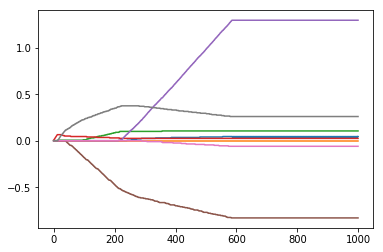

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(returnMat)
plt.show()